# Flower Classification with Transfer Learning

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

### Import Required Libraries and Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Collect Image Paths for Each Flower Category (daisy,dandelion,rose,sunflower,tulip)

In [2]:
aphids = glob('Cotton plant/Cotton plant/Aphids/*.jpg')
army_worm = glob('Cotton plant/Cotton plant/Army worm/*.jpg')
bacterial_blight = glob('Cotton plant/Cotton plant/Bacterial Blight/*.jpg')
healthy = glob('Cotton plant/Cotton plant/Healthy/*.jpg')
powdery_mildew = glob('Cotton plant/Cotton plant/Powdery Mildew/*.jpg')
target_spot=glob('Cotton plant/Cotton plant/Target spot/*.jpg')

### Define Classes and Corresponding Labels

In [3]:
classes = {0: 'aphids', 1: 'army_worm', 2: 'bacterial_blight', 3: 'healthy', 4: 'powdery_mildew',5:'target_spot'}

### Load and Label Images for Each Flower Category

In [4]:
images = []
labels = []

for i in aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in bacterial_blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in healthy:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in powdery_mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

### Plot first few images

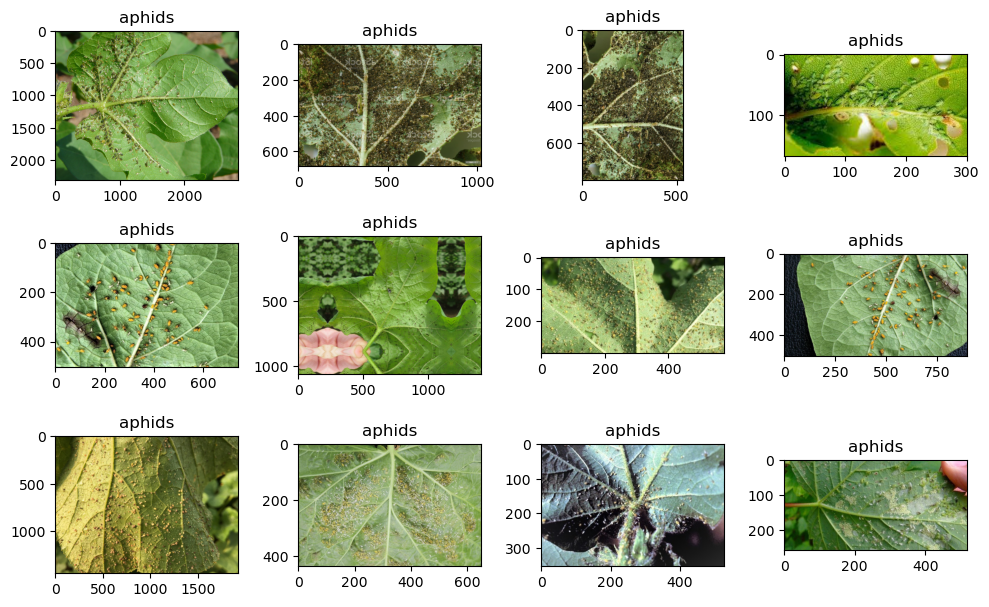

In [5]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the images

In [6]:
images,labels = shuffle(images,labels)

### Plot some of the image after the shuffle

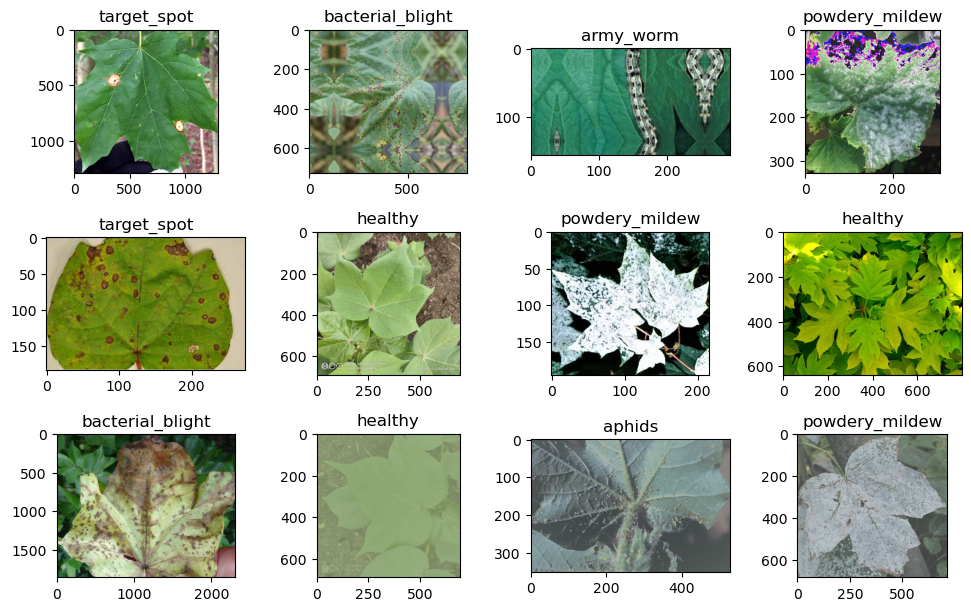

In [7]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [8]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

### Plot some of the images after resizing

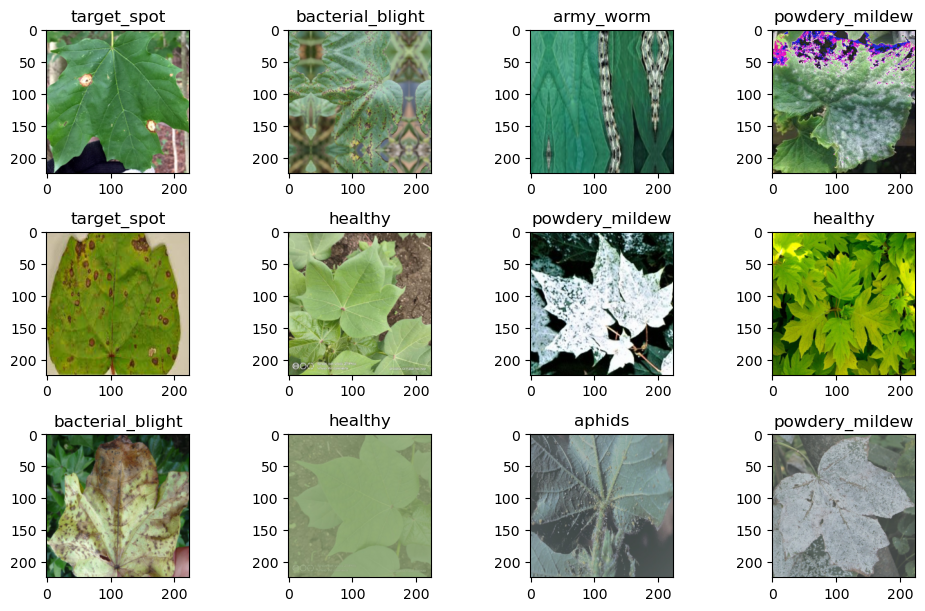

In [9]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [10]:
X = np.array(X)
y = np.array(labels)

### Convert Images and Labels to NumPy Arrays

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [12]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [13]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x398274190>

### Define Number of Output Classes

In [15]:
num_of_classes = 6

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [16]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [17]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

### Compile Transfer Learning Model

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [19]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
57/57 [==============================] - 12s 178ms/step - loss: 0.8792 - accuracy: 0.6969 - val_loss: 0.3537 - val_accuracy: 0.9062
Epoch 2/10
57/57 [==============================] - 10s 178ms/step - loss: 0.2713 - accuracy: 0.9204 - val_loss: 0.1691 - val_accuracy: 0.9479
Epoch 3/10
57/57 [==============================] - 10s 181ms/step - loss: 0.1579 - accuracy: 0.9535 - val_loss: 0.2162 - val_accuracy: 0.9375
Epoch 4/10
57/57 [==============================] - 10s 176ms/step - loss: 0.0879 - accuracy: 0.9768 - val_loss: 0.1159 - val_accuracy: 0.9688
Epoch 5/10
57/57 [==============================] - 10s 176ms/step - loss: 0.0541 - accuracy: 0.9889 - val_loss: 0.1615 - val_accuracy: 0.9583
Epoch 6/10
57/57 [==============================] - 10s 175ms/step - loss: 0.0513 - accuracy: 0.9867 - val_loss: 0.0883 - val_accuracy: 0.9688
Epoch 7/10
57/57 [==============================] - 11s 186ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.1042 - val_accuracy: 0.9792

### Model Prediction on Test Data

In [20]:
y_pred = model.predict(X_test)

15/15 [==============================] - 3s 178ms/step


In [21]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score

In [22]:
accuracy_score(y_test,y_pred)

0.9474789915966386

### Plot confusion matrix on heatmap

<Axes: >

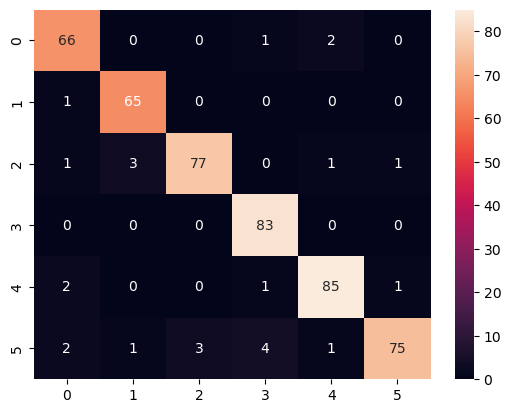

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        69
           1       0.94      0.98      0.96        66
           2       0.96      0.93      0.94        83
           3       0.93      1.00      0.97        83
           4       0.96      0.96      0.96        89
           5       0.97      0.87      0.92        86

    accuracy                           0.95       476
   macro avg       0.95      0.95      0.95       476
weighted avg       0.95      0.95      0.95       476



***